# Introduction

***

### Keras and Tensorflow
Keras is a deep learning API built on top of the Tensorflow machine learning platform. Tensorflow provides high level abstraction and gives the user the tools needed to develop machine learning solutions to solve complex problems. This project content will be based artificial neural networks called autoencoders and will explore Timeseries anomoly detection while leveraging the Keras documentation located on the [Keras website](https://keras.io/examples/timeseries/timeseries_anomaly_detection/). Lets take a look at what can be expected in this project:
- *Background Section* walking through Time Series Anomoly Detection, Neural Networks and Autoencoders.
- *Getting Started Section* where we have a look at the data used in documentation
- Neural Network Section..
- Evaluation Section..

# Background
### Time Series Anomoly Detection

Time series data can be thought of as a collection of data points gathered over time intervals. Evaluating this data allows us to trend how something changes over time and potentially helps us understand the underlying causes of the trends. 
<br>

An anomoly in a dataset can be thought of as an outlier where a datapoint differs significantly from the rest. For obvious reasons there is great benifit to identifying outliers in one's data to help identify potential risks. Bhattacharya (2020) helps describe the importance of detecting anomalies by detailing how companies constantly need to evaluate the "new normal" in the data to ultimately drive business decisions. He then details how one can appraoch this problem via Un-supervised nerual networks. Before exploring the keras variation of this (Autoencoders) lets take a step back and talk about Neural Networks.

###  Neural Networks  

Neural Networks are comprised of inter-connected layers of artificial neurons called nodes that perform operations on input to potentially yield an optimised output for a given problem **[Koech, 2022]**. As detailed by  Kostadinov (2019) a model typically trains itself through a process known as the "Chain Rule", where every feed forward through a network undergoes a back-propagation step where the weights and biases are adjusted based on the gradient of the cost function (we will explore cost functions in more detail later). Let's have a look at single neuron to help understand how they work (See Figure 1 below).

In the single neruron below we can see the inputs labelled as x<sub>1</sub> and x<sub>2</sub> have weights (w<sub>k1</sub>, w<sub>k2</sub>) and a Bias (b<sub>k</sub>) applied to them before being passed through an activation function (φ) to yield the output (y<sub>k</sub>). We can summarise the actions of the single neuron below with an equation that describe how the output is the activated weighted sum of the inputs.

***Equation 1***: A Neuron with 2 inputs: <br>
<span style="font-size:larger;">y<sub>k</sub> = φ( (w<sub>k1</sub> x<sub>1</sub>    + w<sub>k2</sub> x<sub>2</sub>) + b<sub>k</sub>) </span>

<img src="images/neural_network_image.png" width="800">
Figure 1. [Saxena, 2020]  

Lets explore the actions of a neuron in more detail before moving on to Autoencoders. The weights in a network determine dictate how important a given feature is in a model, for example a weights close to zero indicates that this input is not an important feature in the model. Weights help correlate relationships between features in the data dataset to target values. The idea here is that weights can moderate the association between features to prevent positive association on the summation process if the relationship is not positive, for example if we just sum the input data and the bias without multiplying them by the optimal weights we would result in a scenario where feature relationships are purely associative or dis-associative **[Ganesh (2020)]**. 

As per Ganesh (2020) lets explore a scenario where we have two input features and we want to perform binary classification. Figure 2 below shows two classes of data and the activation function using a neural network with weights (red) and without weights (black). The use of weights allows you to alter the slope of the line to better fit your model, whearas without weights the activation function of x<sub>2</sub> = -x<sub>1</sub>  + b has a constant slope of -1. Note that altering the bias just moves the activation function to the left or right and many different types of activation functions exist (we will explore this more later).

In [1]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set_style('darkgrid')

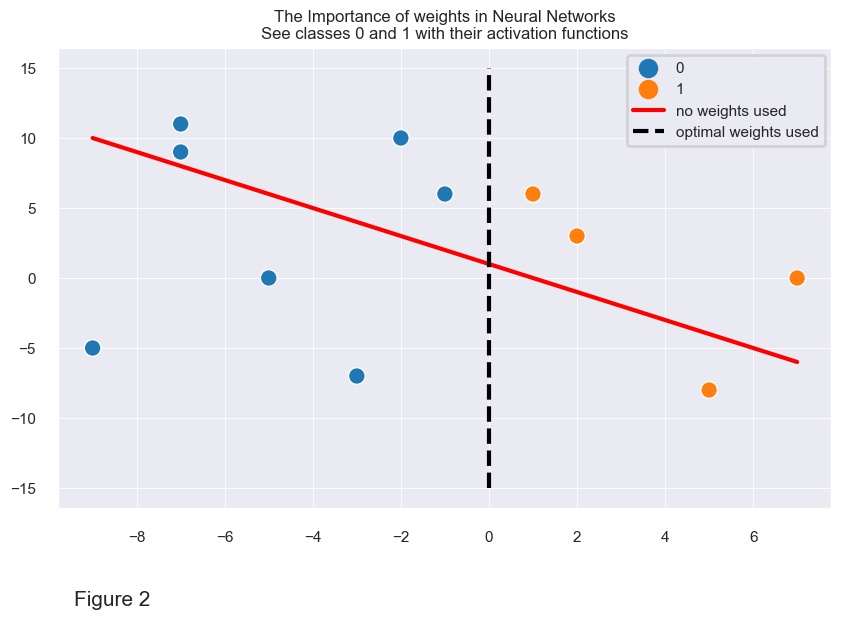

In [2]:
# two input arrays.
x1 = np.array([-9,  1, -5, -3,  5, -7, 2, -2, 7, -7, -1])
x2 = np.array([-5,  6,  0, -7, -8, 11, 3, 10, 0, 9, 6])

# class array (distinguish between features).
xclass = [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]

# set constant bias for plot
bias = 1

# dataframe for plotting.
df = pd.DataFrame({'x1':x1, 'x2':x2, 'class':xclass})

# create figure and single axes.
fig, ax = plt.subplots(figsize = (10, 6))

# plot input data
sns.scatterplot(data=df, x=x1, y=x2, hue='class')

# plot x1 and predicted y value using eqn: (x2 = -x1 + bias) -> no weights applied
sns.lineplot(data=df, x=x1, y =(-x1 + bias), color='red', label='no weights used')

# plot class boundary (activation function) a neural,
# network could achieve with optimal weights.
plt.plot([0, 0], [-15, 15], '--k', label = 'optimal weights used');

# format and label plot.
plt.figtext(0.18, -0.05, 'Figure 2', horizontalalignment='center', fontsize=15);
ax.title.set_text('The Importance of weights in Neural Networks\n\
See classes 0 and 1 with their activation functions')
plt.legend();

### Autoencoders  

An Autoencoder is a type of artifical neural network used to learn data encodings in an unsupervised manner, where the aim is to learn a lower-dimensational representation for higher dimenstional data **[Bandyopadhyay, 2022]**. This statement contains a lot of information, lets parse out the detail.

The ability of an Autoencoder to leverage the un-supervised learning approach allow us to draw insight from unlabelled data which is of great benifit as it can be very costly to label large datasets. The ANN's ability to transform data from higher to lower-dimensional space is very important as it can be very difficuly to interpret higher dimensional data. Think of a model trying to learn with a large number of input variables across 3 dimensions where the the important data needed to effectively train the model only occupies localised regions of the space. With such a scenario it could be computationally heavy to extract the relevant information from the space and could potentially lead to overfitting as more features are fed into the model, i.e: the model finds the best solution that may not be representative of the real world problem. Lets walk through figure 3 below to get a better understanding of how Autoencoders work.

As shown below they are comprised of an Input Layer, hidden layers (with a bottle neck) and an output layer. We can see that the encoding process occurs in the hidden layers before the bottelneck. The task of the encoder is compress the data to a lower dimension (as discussed presviously). This is achieved at the bottleneck as it forces information loss, this imperfect data is then passed through the decoder for de-compression and a reconstruction error is calculated (i.e difference between pre and post compression values). 

This reconstruction error can be leveraged when trying to detect anomalous data. Imagine an autoencoder model which was trained to the highest possible degree in the lower dimensional space. An outliar data point relative to the model would have a high reconstruction error and therefore be labelled as an anomoly. Ok lets get into the Keras documentation on their approach using an autoencoder for timeseries anomaly detection.

<img src="images/autoencoder.png" width="700">
Figure 3. [Bandyopadhyay, 2022]


<br>

# Getting Started

***

### Looking at the Dataset

As per the [Keras documentation](https://keras.io/examples/timeseries/timeseries_anomaly_detection/) we will use two datasets from the Numenta Anomaly Benchmark (NAB). NAB is a benchmark for testing algorithms for anomoly detection in streaming online applications. Details on the NAB Datasets and how different algorithms performed on the datasets can be accessed at the  [NAB documentation](https://github.com/numenta/NAB) on github. The scoreboards located here compare the algorithms performances based on standard profile vs. false positives and negative scores obtained. For this project we will be exploring two datasets:
1. Artifical with no anomoly ([art_daily_small_noise.csv](https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv))
2. Artifical with anomoly ([art_daily_jumpsup.csv](https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv))


In [3]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [4]:
# read no anomaly file and with timestanp column as index.
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp", float_precision=None)

# look at last 5 rows of dataset.
df_small_noise.tail()

,value
timestamp,
2014-04-14 23:35:00,20.211195
2014-04-14 23:40:00,20.531041
2014-04-14 23:45:00,19.032127
2014-04-14 23:50:00,21.798801
2014-04-14 23:55:00,18.682620


In [5]:
# Check un-formatted value of last row in small noise dataset,

df_small_noise.iloc[-1].values[0]

18.6826203655

In [6]:
# check datatype present in dataframe.
# Notice pandas is performing some rounding when converting to float64.

df_small_noise.dtypes

value    float64
dtype: object

In [7]:
# Confirm shape of dataset.

df_small_noise.shape

(4032, 1)

In [8]:
# Generate descriptive stats on dataset.

df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


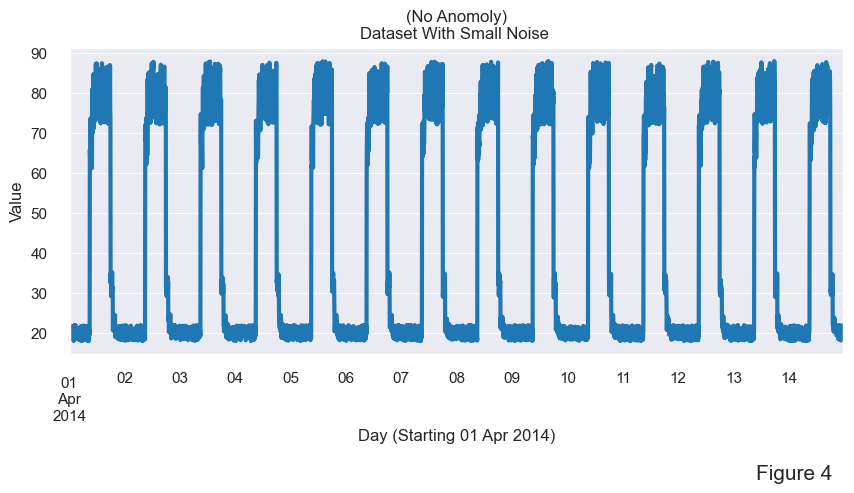

In [9]:
# create figure and single axes.
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax)

# format and label plot.
ax.set_xlabel('Day (Starting 01 Apr 2014)')
ax.set_ylabel('Value')
ax.set_title("(No Anomoly)\nDataset With Small Noise ")
plt.figtext(0.85, -0.2, 'Figure 4', horizontalalignment='center', fontsize=15);

In [10]:
# read anomaly file and with timestanp column as index.
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

# look at first 5 rows.
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [11]:
# Confirm shape of dataset.

df_daily_jumpsup.shape

(4032, 1)

In [12]:
# Generate descriptive stats on dataset.

df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


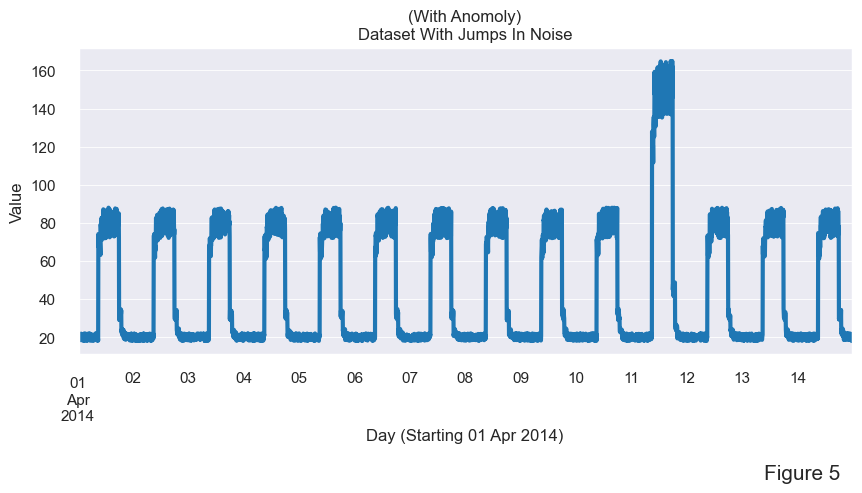

In [13]:
# create figure and single axes.
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax)

# label plot.
ax.set_xlabel('Day (Starting 01 Apr 2014)')
ax.set_ylabel('Value')
ax.set_title("(With Anomoly)\nDataset With Jumps In Noise")
plt.figtext(0.85, -0.2, 'Figure 5', horizontalalignment='center', fontsize=15);

As shown by the Pandas *describe* method the mean, maximum, std deviation and quartiles values are all higher for the dataset with anomolies. The *shape* method also confirms that both datasets are 1-dimensional with 4032 rows.


<br>

## Pre-processing

***

Before we build the Neural Network we will need to carry out a few Pre-processing tasks. Data Pre-processing is a very important step before the modelling of a dataset as it prepares the raw data for modelling. We will perform the following operations on our data:
- **Standardization** of the data to ensure it is scaled properly. This is an important pre-processing step for machine learning models as all features are alligned to a common scale which contributes to more efficient learning. The expected outcome of this process is that the data will have a mean of nearly zero and a standard deviation of 1. 
- **Transformation** of the data to create a fully windowed datset. Windowing a dataset involves partitioning it into sub-sections and increasing the number of dimensions (UM, 2020). The transformed dataset can then be leveraged via a convolutional neural network in the Keras library (more on this later).

### Standardization

In [14]:
# calculate mean of dataset with small noise.
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [15]:
# calculate standard deviation of dataset with small noise.
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [16]:
# Standardization of data to transform it to standard format.
df_train_vals = (df_small_noise - train_mean) / train_std

# check first 5 rows.
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [17]:
# confirm mean is nearly 0.

df_train_vals['value'].mean()

-2.616541242931684e-15

In [18]:
# confirm std dev is nearly 1.

df_train_vals['value'].std()

1.0000000000000018

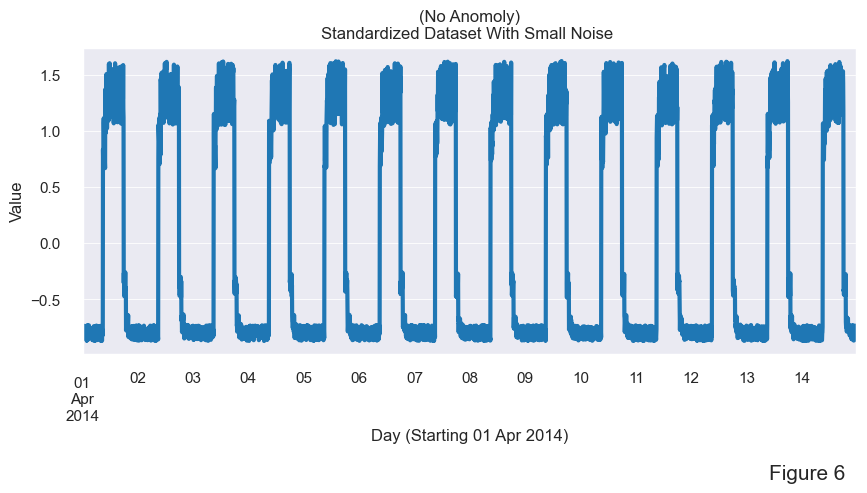

In [19]:
# create figure and single axes.
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax)

# format and label plot.
ax.set_xlabel('Day (Starting 01 Apr 2014)')
ax.set_ylabel('Value')
ax.set_title("(No Anomoly)\nStandardized Dataset With Small Noise ")
plt.figtext(0.85, -0.2, 'Figure 6', horizontalalignment='center', fontsize=15);

### Transformation

Before transforming our data to a windowed, higher-dimensional dataset let's take a look at an example of a windowed dataset:
```python
pre_window =  [1, 1, 2, 4, 5, 6, 7, 1, 2]
window_size =  3
post window = [1, 1, 2]     
              [1, 2, 4]
              [2, 4, 5]
              [4, 5, 6]
              [5, 6, 7]   
              [6, 7, 1] 
              [7, 1, 2]            
```

In [20]:
def windows(vals, window_size):
    '''
    Returns stacked windows (2D Numpy array) relative to passed window size N
    '''   
    # declare empty list.
    L = []
    # loop through all the possible windows.
    for i in range(len(vals) - window_size + 1):
        # append a windows to the list.
        L.append(vals[i:i + window_size])
        
    # Stack the windows to form 2D numpy array.
    return np.stack(L)

In [21]:
# declare window size.
window_size = 288

# get 2D numpy array of training values (with 288 windows).
x_train = windows(df_train_vals, window_size)

In [22]:
# First value of first window and last value of last window.

f'{x_train[0][0][0]:.5f}', \
f'{x_train[-1][-1][0]:.5f}'

('-0.85883', '-0.84609')

In [23]:
# First and last Values in Training Dataset

f'{df_train_vals.iloc[0][0]:.5f}', \
f'{df_train_vals.iloc[-1][0]:.5f}'

('-0.85883', '-0.84609')

In [24]:
# check dimensions are correct (notice 288 windows).

x_train.shape

(3745, 288, 1)

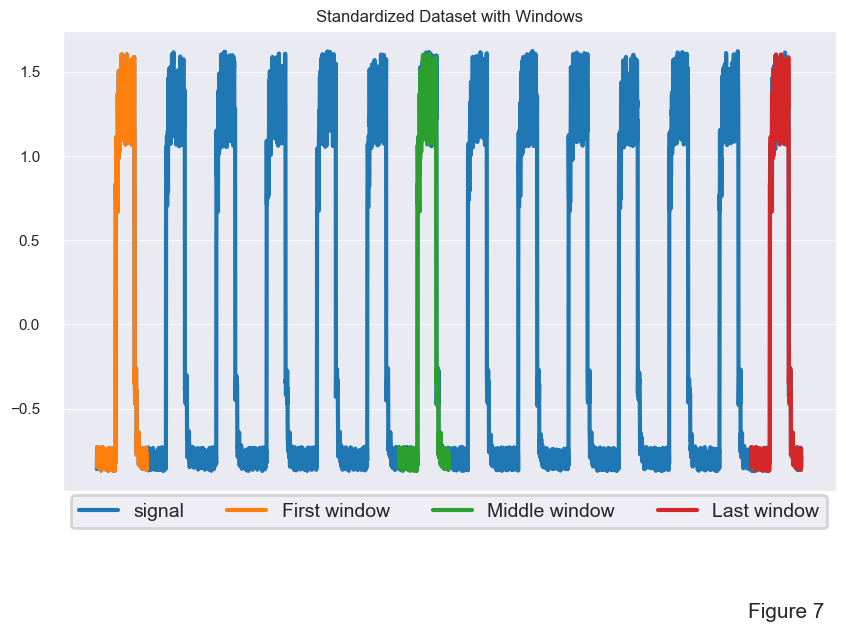

In [25]:
# Create figure and single axes.
fig, ax = plt.subplots(figsize=(10, 6))

# set y var to df train values 
y = df_train_vals['value'].values# [:1200]

# plot dataset signal 
# (leverage np.arange function to generate custom x-axis)
ax.plot(np.arange(y.shape[0]), y, label='signal')

# Declare the first window
w = x_train[1].flatten()  # flatten collapses array into 1 dimension

# Plot the first window.
ax.plot(np.arange(w.shape[0]) + 1, w, label='First window')

# Plot the Middle window.
ax.plot(np.arange(w.shape[0]) + 1728, w, label='Middle window')

# Plot the Last window.
ax.plot(np.arange(w.shape[0]) + 3745, w, label='Last window')

# Hide yaxis as the labels no longer reflect time
ax.axes.get_xaxis().set_ticks([]) 

# format and label plot.
ax.set_title("Standardized Dataset with Windows")
plt.figtext(0.85, -0.1, 'Figure 7', horizontalalignment='center', fontsize=15)
ax.legend(bbox_to_anchor=(0, -0.1 ,1 ,0.2),mode="expand", ncol=4, fontsize = 14);

## Building The Neural Network

***

Lets build the Neural network as per the [documentation](https://keras.io/examples/timeseries/timeseries_anomaly_detection/). For clairty each step in the code will be numbered as a reference point to be discussed in more detail post model declaration.

In [26]:
# get number of neurons and dimensions from x_train.
num_nodes = x_train.shape[1]
num_dimensions = x_train.shape[2]

In [27]:
#
layers = [
   # 1. instantiate Keras Tensor (takes window as input)
  keras.layers.Input(shape=(num_nodes, num_dimensions)),
    
  # 2. Declare first 1D convolution layer.
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
    
  # 3. Declare Dropout layer.
  keras.layers.Dropout(rate=0.2),
    
  # 4. Declare second 1D convolution layer.
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
    
  # 5. Declare Transposed convolution layer.
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
    
  # 6. Declare Dropout layer.
  keras.layers.Dropout(rate=0.2),
    
  # 7. Declare Transposed convolution layer.
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
    
   # 8. Declare Transposed convolution layer.
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

Model declaration steps (see documentation references as hyperlinks):

#### 1. [Input Object:](https://keras.io/api/layers/core_layers/input/)
As per the documentation the Input layer is a symbolic tensor-like object which in this case is instansiated with batches of 288-dimensional vectors (i.e: the number of windows). A tensor is esentially a container with n-dimensions that gives us the means to mathamatically describe the relationship of these containers relative to eachother in a given vector space. For Neural networks tensors allow us to represent the transformation of the input data to hopefully yield the desired output. <br><br>

 

#### 2. [First Conv1D:](https://keras.io/api/layers/convolution_layers/convolution1d/)
As per the documentation “*This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs.*”  Lets try and break this down into into smaller parts in an attempt to understand it.<br>

- **[1D-Convolution:](https://keras.io/api/layers/regularization_layers/dropout/)** <br>
The process of convolution in neural networks refers to placing filters (i.e: weights) of pre-defines size (kernel size) over your input data. The windows are the slid across the input vector, performing element-wise multiplication of the input element with the corresponding weights to produce an output. This dot product operation between the kernel size patch of the input and the filter is then summed to produce a single scalar product [16 Brown 2020]. Successive dot product operations via the same filter on different sections of the input result in more scalar products that form a feature map. Brownlee (2022) helps explain how this feature map is then passed to an activation function (ReLU in our case) for processing. Note we will discuss this activation function in more detail below.<br><br>

- **[Padding:](https://keras.io/api/layers/regularization_layers/dropout/)** <br>
In our model we are using a weights array of size 7 (kernel size). Using a kernel size or more than 1 results in an output vector of smaller than the input size, however we can control this by setting the model’s padding attribute to “same”. This adds zeros to each end of the output vector to match its size to that of the input. This is an important step as we want to regenerate our output as part of the autoencoder model. <br><br>

- **[Stride:](https://keras.io/api/layers/regularization_layers/dropout/)** <br>
In our model we have declared a stride of 2, meaning that our filter will move 2 elements at a time during the convolution process. Setting the stride to 2 will down-sample the input vector by half, resulting in an output vector of half the size.  <br><br>



#### 3. [First Dropout:](https://keras.io/api/layers/regularization_layers/dropout/)
As Per the documentation the dropout layer randomly sets a percentage of the inputs to zero and scales the others, this is done to help prevent overfitting. In our case we have set a rate of 0.2 meaning 20% of the layer will randomly be set to zero, while the other 80 % will be scaled up. The idea here is that we don’t want our model to learn the statistical noise in our training dataset as this may hinder its ability to predict new data. The dropout layer essentially helps reset previous layer activations in the model, helping one model learn many network architectures.

#### 4. [Second Conv1D:](https://keras.io/api/layers/convolution_layers/convolution1d/)


#### 5. [First Conv1DTranspose Layer:](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1DTranspose)

#### 6. Second Dropout:
#### 7. Second Conv1DTranspose Layer:
#### 8. Output Layer:



In [28]:
# https://keras.io/guides/sequential_model/
# declared model with plain stack of layers 
# Each layer has 1x input tensor and 1x output tensor

model = keras.Sequential(layers)

In [29]:
# https://keras.io/api/optimizers/
# declare optimiser for model with learning rate.

optimizer = keras.optimizers.Adam(learning_rate= 0.001)

In [30]:
# compile model with passed Adam optimiser and mean sq. error loss function.

model.compile(optimizer=optimizer, loss="mse")

### Adaptive Moment Estimation (Adam)

Adam is a very popular optimization algorithm used in machine learning. Optimisers guide the learning process of a model by mimimizing the error of the loss function (mean squaread error in our case). The loss function is used by the optimiser as a metric for how close our input data is to our output data. The optimiser tweaks our models weights until the cost function reaches its lowest value (hopefully).

To help understand how Adam works first lets explore Gradient Descent which is a key component of Adam. Musstafa (2021) helps describe how Gradient Descent iteratively reduces a loss function by moving in the opposite direction to the steepest ascent. He then goes on to detail how the descent leverages the first-order derivatives of the loss functions to know which way will ascend the slope. If we look at Figure 8 below it is easier to visualise this.

In Figure 8 we can see the learning steps improving with each step (red dots). The size of the steps  is determined by multiplying the step size hyperparameter by the gradient at that step. One can run into problems by not setting the correct step size which could result in a scenario where the global minima is not reached. Brownlee (2021) helps detail how Adam optimises the step size throughout the learning process by tracking the history of the gradient. This will aid our model in traversing a terrain with noise, for example in figure 8 below we have a local minima where a data point is stuck. Gradient Descent and some of its close cousins could find themselves in a situation where their next learning step can not overcome the hump, whearas Adam would have a greater chance of overcoming the noise as it has a good perspective on the gradient's history.

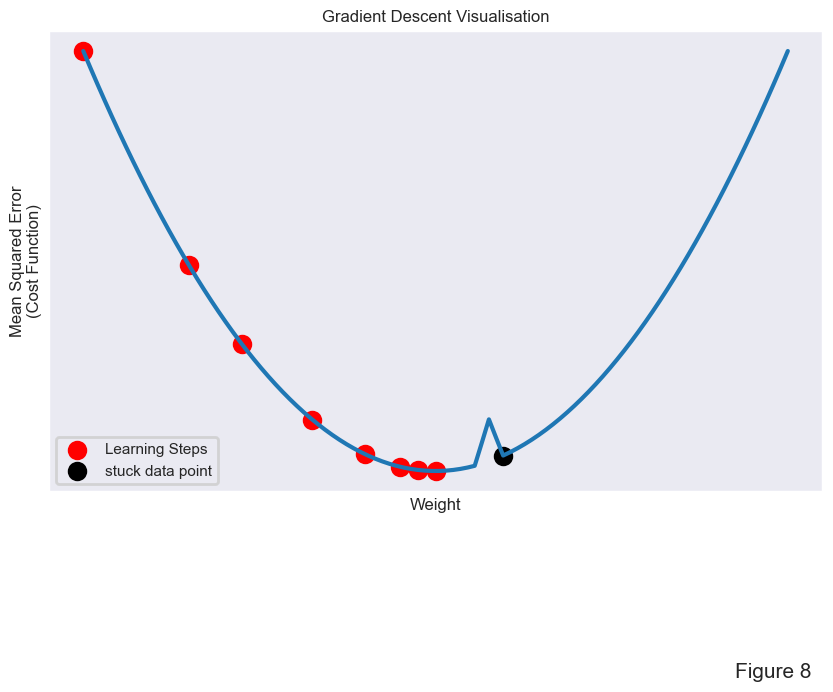

In [31]:
# create figure and single axes.
fig, ax = plt.subplots(figsize = (10,6))
plt.figtext(0.85, -0.2, 'Figure 8', horizontalalignment='center', fontsize = 15);

# Plot x vs x squared
x = np.linspace(-1, 1, 100)
y = x * x

# alterting y values to incorperate local minima into plot***
# get index of datapoint passed half-way point 
idx = int((len(x) // 1.75))

# alter y-values at and around index
y[idx-1] = y[idx-1] +0.05
y[idx] = y[idx] + 0.1
y[idx+1] = y[idx+1] + 0.05

# plot function
ax.plot(x, y)

# plot learning steps
weights = [-1, -0.70, -0.55, -0.35, -0.20, -0.10, -0.05, 0.00]
costs = [weight ** 2 for weight in weights]
ax.scatter(weights, costs, color='red',  label = 'Learning Steps')

# plot datapoint stuck at local minima
ax.scatter(x[idx+2], y[idx+2], color='black', label = 'stuck data point')

# label plot.
ax.set_xlabel('Weight')
ax.set_ylabel('Mean Squared Error\n(Cost Function)')
ax.set_title("Gradient Descent Visualisation")

# Hide axis ticks
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
plt.legend()
plt.show();

### Rectified Linear Unit (ReLU)

ReLU is a type of activation function used in Neural Networks. An activation functions role is to map the summed weighted input to an output that dictates how a neuron should behave [Sharma 2017]. Popular non-linear activation functions such as the sigmoid and Tanh functions work by transforming the input to values between 0 to 1 and -1 to 1 respectively, which means that large changes in the input data can result in small changes in the output. Lets compare the sigmoid and ReLU activation function to help understand the differences.

ReLU is a linear activation function used that works by mapping negative values to zero. ReLU activation can have an advantage over sigmoid activation due to the shape of it's first-order derivative. Lets have a look at Figure 9 below to help explore this. Notice how the derivatives of the functions differ. We can see that the sigmoid derivative peaks at 0.25 and drops into two tails, whearas the ReLU derivative shows either a value of 0 or 1. Why can this be a problem for simoidal activation? First lets take a step back and understand how activation functions on the neuron level effect a model's ability to learn.

Jacob (2022) explains how we can represent the gradient of the loss function as the product of gradients of all the activation functions of all nodes with respect to their weights [Jacob (2022)]. In order words, the updated weights depend on the gradients of the individual activation functions that are used during the backpropagation process in calculations that obey the chain rule. This means that if your activation function have the potential to degrade overtime it will in-turn diminish your models ability to alter its weights and learn.

In [32]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_der(x):
    return 1/(1 + np.exp(-x)) * (1 - 1/(1 + np.exp(-x)))

def relu(x):
    return np.array([max(0,value) for value in x])

def relu_der(x):
    return np.array([1 if value>0 else 0 for value in x])

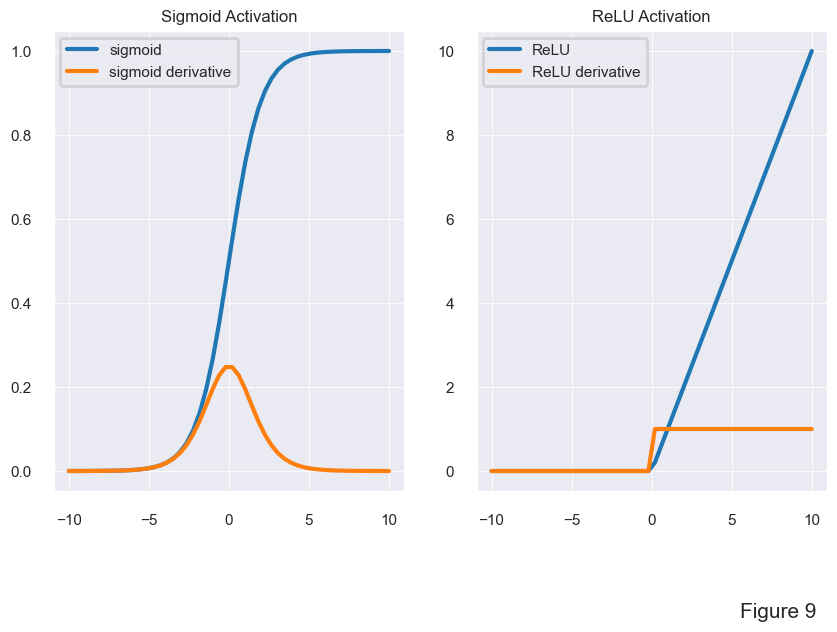

In [33]:
# create figure and 2 axis.
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(10 ,6))
plt.figtext(0.85, -0.1, 'Figure 9', horizontalalignment='center', fontsize=15)

# declare plot data.
x = np.linspace(-10, 10, 50)    

# plot data.
ax1.plot(x, sigmoid(x), label = 'sigmoid') 
ax2.plot(x, relu(x), label = 'ReLU') 
ax1.plot(x, sigmoid_der(x), label = 'sigmoid derivative') 
ax2.plot(x, relu_der(x), label = 'ReLU derivative') 

# label and format plots.
ax1.set_title("Sigmoid Activation") 
ax2.set_title("ReLU Activation") 
ax1.legend()
ax2.legend()
plt.show();

<h2>References:</h2>

<br> 

[1]. Bhattacharya, A, 2020, Effective Approaches for Time Series Anomaly Detection, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/effective-approaches-for-time-series-anomaly-detection-9485b40077f1) (Viewed 21 December 2022).

<br>

[2]. Bandyopadhyay, H, 2022, Autoencoders in Deep Learning: Tutorial & Use Cases, V7labs, available at:<br>
[Ref Link](https://www.v7labs.com/blog/autoencoders-guide) (Viewed 21 December 2022).

<br>

[3].Koech, K, 2022, The Basics of Neural Networks (Neural Network Series) — Part 1, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/the-basics-of-neural-networks-neural-network-series-part-1-4419e343b2b) (Viewed 22 December 2022).

<br>


[4] Saxena, A, 2020, Building a Simple Neural Network from Scratch, Towards Data Science, available at:<br>[Ref Link](https://miro.medium.com/max/640/1*UWJ52M5qNZp-38j11STT5g.webp) (Viewed 22 December 2022).

<br>

[5]. Ganesh, S, 2020, What’s The Role Of Weights And Bias In a Neural Network?, Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/whats-the-role-of-weights-and-bias-in-a-neural-network-4cf7e9888a0f) (Viewed X December 2023). ******* Figure 2*******

<br>

[6].JORDAN, J, 2018, Introduction to autoencoders. Data Science, available at:<br>
[Ref Link](https://www.jeremyjordan.me/autoencoders/) (Viewed 23 December 2022).


<br>   

[7]. S, Kostadinov, 2019, Understanding Backpropagation Algorithm, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd) (Viewed 23 December 2022).

<br>

[8]. Um, A, 2020, Preprocessing time series to windowed datasets, medium.com, available at:<br>
[Ref Link](https://albertum.medium.com/preprocessing-time-series-to-windowed-datasets-a464799b1df7) (Viewed 28 December 2022).

<br>


[9]. MathWorks, 2022, available at:<br>
[Ref Link](https://www.mathworks.com/help/deeplearning/ref/nnet.cnn.layer.convolution1dlayer.html) (Viewed 30 December 2022).

<br>



[10]. Mostafavi, K, 2022, What is the difference between the kernel size and the number of filter in CNN?, Quora, available at:<br>
[Ref Link](https://www.quora.com/What-is-the-difference-between-the-kernel-size-and-the-number-of-filter-in-CNN) (Viewed 30 December 2022).

<br>


[11]. SHARMA, S, 2017, Activation Functions in Neural Networks, Towards Data Science, available at: [Ref Link](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6) (Viewed 30 December 2022).

<br>


[12].  Brownlee, J, 2020, A Gentle Introduction to the Rectified Linear Unit (ReLU), Machine Learning Mastery, available at:<br>
[Ref Link](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) (Viewed 30 December 2022).

<br>

[13]. Musstafa, 2021, Optimizers in Deep Learning, Medium.com,  available at:<br>
[Ref Link](https://medium.com/mlearning-ai/optimizers-in-deep-learning-7bf81fed78a0) (Viewed 01 January 2023).

<br>

[14]. Brownlee, J, 2021, Code Adam Optimization Algorithm From Scratch, available at:<br>
[Ref Link](https://machinelearningmastery.com/adam-optimization-from-scratch/) (Viewed 02 January 2023).

<br>

[15]. Jacob, T, 2022, Vanishing Gradient Problem, Explained, KD Nuggets, available at:<br>
[Ref Link](https://www.kdnuggets.com/2022/02/vanishing-gradient-problem.html) (Viewed 02 January 2023).

<br>

<br>

[16]. Brownlee, J, 2020, How Do Convolutional Layers Work in Deep Learning Neural Networks? Machine Learning Mastery, available at:<br>
[Ref Link](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/) (Viewed 03 January 2023).

<br>

<br>

[17]. x, y, 202-, ..., ..., available at:<br>
[Ref Link](link here) (Viewed X December 2022).

<br>

<br>

[18]. x, y, 202-, ..., ..., available at:<br>
[Ref Link](link here) (Viewed X December 2022).

<br>


<br>

[19]. x, y, 202-, ..., ..., available at:<br>
[Ref Link](link here) (Viewed X December 2022).

<br> 

In [34]:
# print summary of neural network.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

Now we will train the model. Notice in the cell below that we pass the same input and output data to the model.fit() function. This makes sense because we are training our neural network to make the neural connections relative to itself to learn the how the data is connected. Training a model on itself will be useful later on when we want to recognise any outliars. Think back to the Autoencoder section above where we explored how the reconstruction error of the model can be leveraged when try to detect anomalous data. 

In [35]:
# https://keras.io/api/models/model_training_apis/
# train the model with the parameters shown:
num_epochs = 50

history = model.fit(
    x_train,               # input data.
    x_train,               # output data (same as input data as same data expected in output).
    epochs=num_epochs,     # training iterations on dataset.
    batch_size=128,        # number of samples per gradient update.
    validation_split=0.1,  # 10% of data used as validation data.
    callbacks=[
        # https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
        # Apply EarlyStopping callback during training, 
        # Stop training when the min validation loss hasn't improved after 5 epochs.
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 4s 91ms/step - loss: 0.4727 - val_loss: 0.0635
Epoch 2/50
27/27 [==============================] - 2s 71ms/step - loss: 0.0810 - val_loss: 0.0428
Epoch 3/50
27/27 [==============================] - 2s 79ms/step - loss: 0.0598 - val_loss: 0.0367
Epoch 4/50
27/27 [==============================] - 2s 73ms/step - loss: 0.0506 - val_loss: 0.0309
Epoch 5/50
27/27 [==============================] - 2s 69ms/step - loss: 0.0426 - val_loss: 0.0265
Epoch 6/50
27/27 [==============================] - 2s 67ms/step - loss: 0.0371 - val_loss: 0.0234
Epoch 7/50
27/27 [==============================] - 2s 68ms/step - loss: 0.0331 - val_loss: 0.0224
Epoch 8/50
27/27 [==============================] - 2s 61ms/step - loss: 0.0301 - val_loss: 0.0213
Epoch 9/50
27/27 [==============================] - 2s 72ms/step - loss: 0.0279 - val_loss: 0.0200
Epoch 10/50
27/27 [==============================] - 2s 65ms/step - loss: 0.0262 - val_loss: 0.0199
Epoch 11/

In [45]:
# Check what the History callback was tracking.

history.history.keys()

dict_keys(['loss', 'val_loss'])

# Evaluation

***

## Training

Before we evaluate the models Training Loss and Validation Loss lets define what they are.
- **Training Loss:** This is a measure of how the models performs on the training set using our cost function as a guage. Earlier the model was fit with a validation set of 10%, leaving 90% of the dataset for training. One expects the mean squared error to drop during the training of the model as we previously discussed.
- **Validation Loss:** Acts as a measure of how well our trained model fits the validation set. It is important that the validation set was not used to train our model as we want to see how good our model is at predicting new data. <br>

Looking at the results in Figure 10 below we can see that our model probably does not require any more training as the Training and Validation loss metrics are almost parallel with the x-axis on full dataset plot. The plot showing epoch 25 to 50 shows that loss metrics are following the same trend which is not surprising considering the intermittent nature of the data.

In [52]:
# x range for full number of epochs.
x = list(range(1, num_epochs + 1))

# get index for element at centre position.
idk = len(x)//2

# declare traning and validation loss arrays.
loss_t = history.history["loss"]
loss_v = history.history["val_loss"]

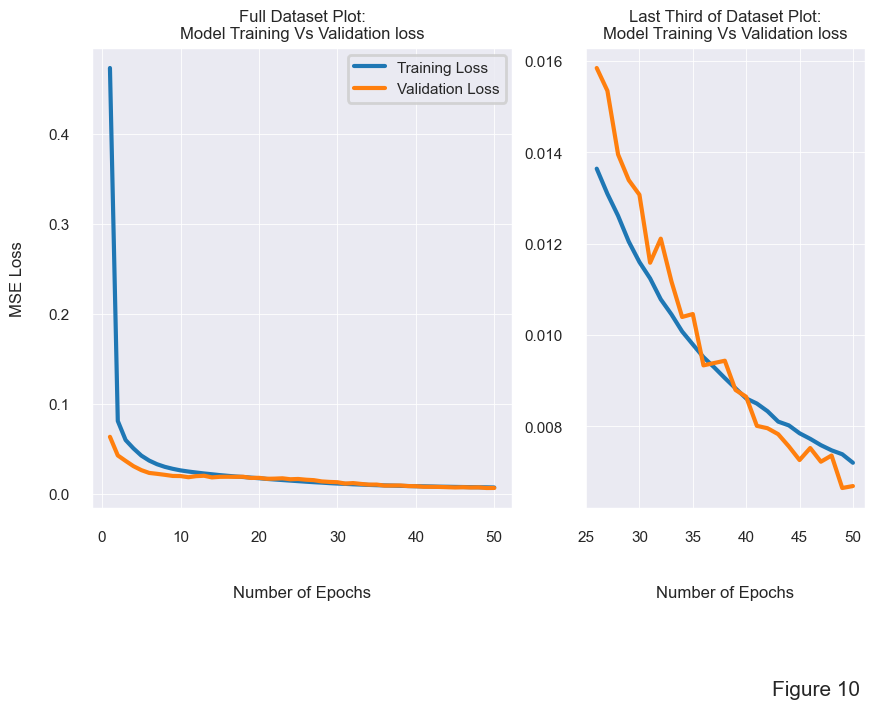

In [53]:
# create figure and 2 axis.
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(10 ,6), gridspec_kw={'width_ratios': [1.5, 1]})
idx = 25
# Plot Full dataset for Training and Validation Loss.
ax1.plot(x, loss_t, label="Training Loss")
ax1.plot(x, loss_v, label="Validation Loss")

# Plot Second half of Training and Validation Loss.
ax2.plot(x[idk:], loss_t[idk:], label="Training Loss")
ax2.plot(x[idk:], loss_v[idk:], label="Validation Loss")

# Label and format Plots.
ax1.legend()
ax1.set_ylabel('MSE Loss\n')
ax1.set_xlabel('\n\nNumber of Epochs')
ax2.set_xlabel('\n\nNumber of Epochs')
ax1.set_title('Full Dataset Plot:\nModel Training Vs Validation loss')
ax2.set_title('Last Third of Dataset Plot:\nModel Training Vs Validation loss')
plt.figtext(0.85, -0.2, 'Figure 10', horizontalalignment='center', fontsize=15);

In [57]:
# Reminder of training dataset shape

x_train.shape

(3745, 288, 1)

In [40]:
# Use model to try and predict itself using x_train. 

x_train_pred = model.predict(x_train)

118/118 [==============================] - 1s 6ms/step


In [41]:
# Calculate mean absolute error between training set and prediction set.

train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

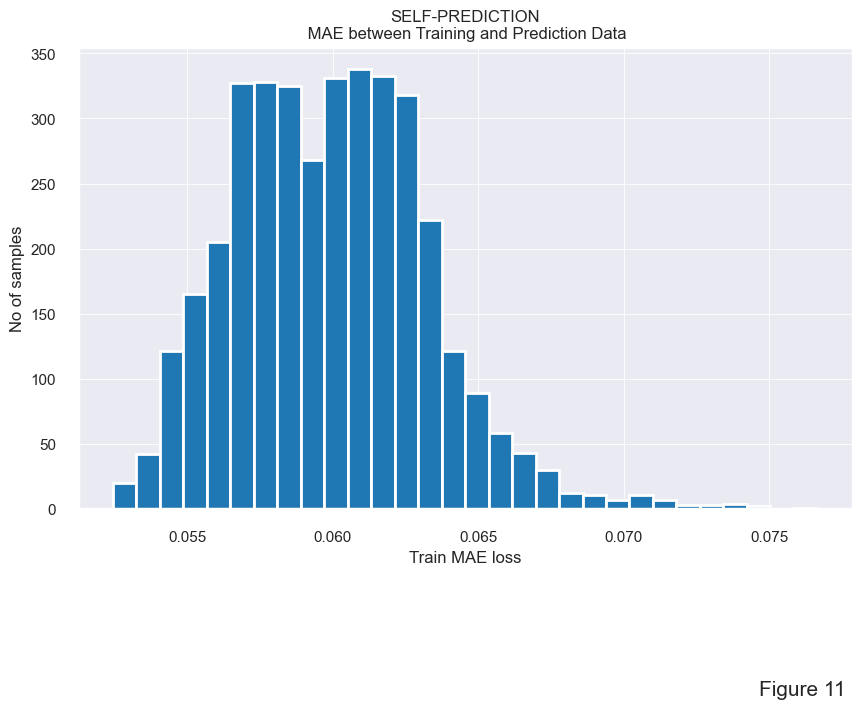

In [114]:
# Create figure and single axes.
fig, ax = plt.subplots(figsize = (10, 6))

# plot histogram of mean absolute error from self-prediction.
ax.hist(train_mae_loss, bins=30)

# label and format plot
ax.set_xlabel('Train MAE loss')
ax.set_ylabel('No of samples')
ax.set_title('SELF-PREDICTION\n MAE between Training and Prediction Data')
plt.figtext(0.85, -0.2, 'Figure 11', horizontalalignment='center', fontsize=15);

Reconstruction Error can be used as benchmark, or in other words we can use it as a treshold when detecting anomalous data.. more on this

In [123]:
# Get reconstruction error threshold.
threshold = np.max(train_mae_loss)

# have a look at treshhold.
f'{threshold:.5f}'

'0.07666'

anomoly input should predict a different output

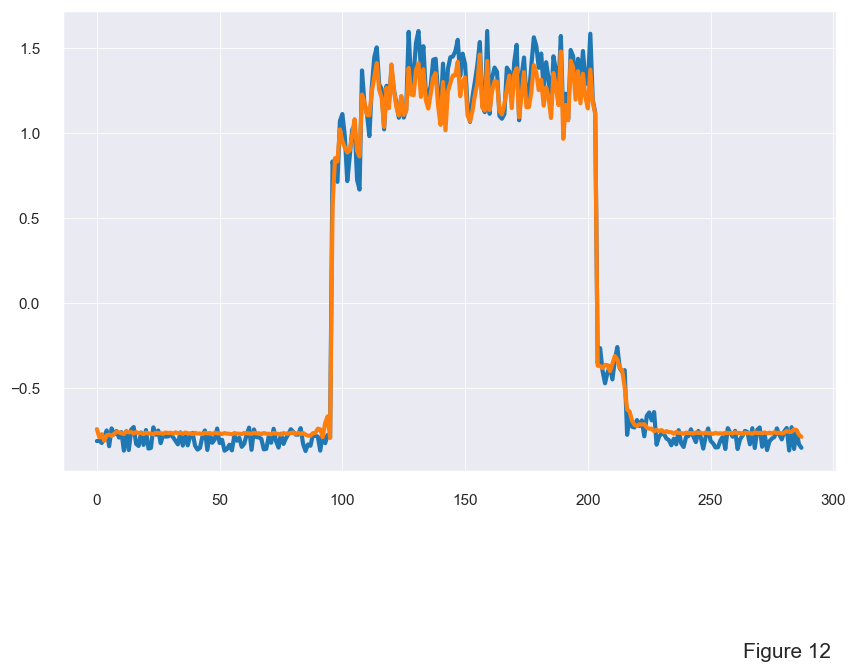

In [101]:
window_number = 12

# Create figure and single axes.
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the training set.
ax.plot(x_train[window_number])

# Plot the neural network predictions (based on training inputs).
ax.plot(x_train_pred[window_number]);

# format plot.
plt.figtext(0.85, -0.2, 'Figure 12', horizontalalignment='center', fontsize=15);

In [124]:
# Standardization of noisy data to transform it to standard format (as before)

df_test_value = (df_daily_jumpsup - train_mean) / train_std

# look at last 5 rows

df_test_value.tail()

,value
timestamp,
2014-04-14 23:35:00,-0.867742
2014-04-14 23:40:00,-0.763481
2014-04-14 23:45:00,-0.778984
2014-04-14 23:50:00,-0.861348
2014-04-14 23:55:00,-0.732810


In [126]:
# confirm mean is nearly 0 and std dev nearly 1

df_train_vals['value'].mean(),\
df_train_vals['value'].std()

(-2.616541242931684e-15, 1.0000000000000018)

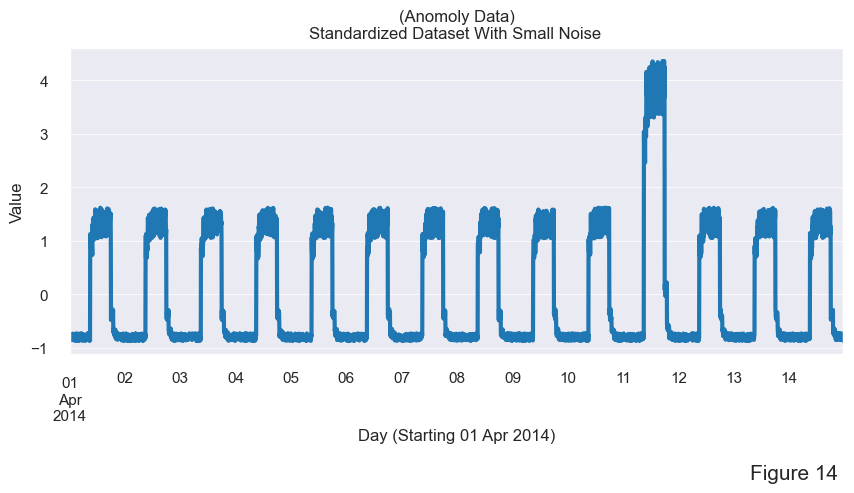

In [129]:
# create figure and single axes.
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_test_value.plot(legend=False, ax=ax)

# format and label plot.
ax.set_xlabel('Day (Starting 01 Apr 2014)')
ax.set_ylabel('Value')
ax.set_title("(Anomoly Data)\nStandardized Dataset With Small Noise ")
plt.figtext(0.85, -0.2, 'Figure 14', horizontalalignment='center', fontsize=15);

In [130]:
# get 2D numpy array of test values (with 288 windows).
x_test = windows(df_test_value.values, window_size = 288)

x_test.shape

(3745, 288, 1)

In [83]:
# Use model to try and predict test values. 

x_test_pred = model.predict(x_test)

118/118 [==============================] - 1s 6ms/step


In [139]:
# Calculate mean absolute error between test set and prediction set.
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

# Collapse all the arrays into 1 demension
test_mae_loss = test_mae_loss.flatten()
test_mae_loss

array([0.05917701, 0.05869053, 0.05743987, ..., 0.05977451, 0.06187452,
       0.06289499])

In [140]:
# note for self:
#The histogram region at < 0.1 is due to same as above, region at nearly 0.6 is as a result of the anomoly


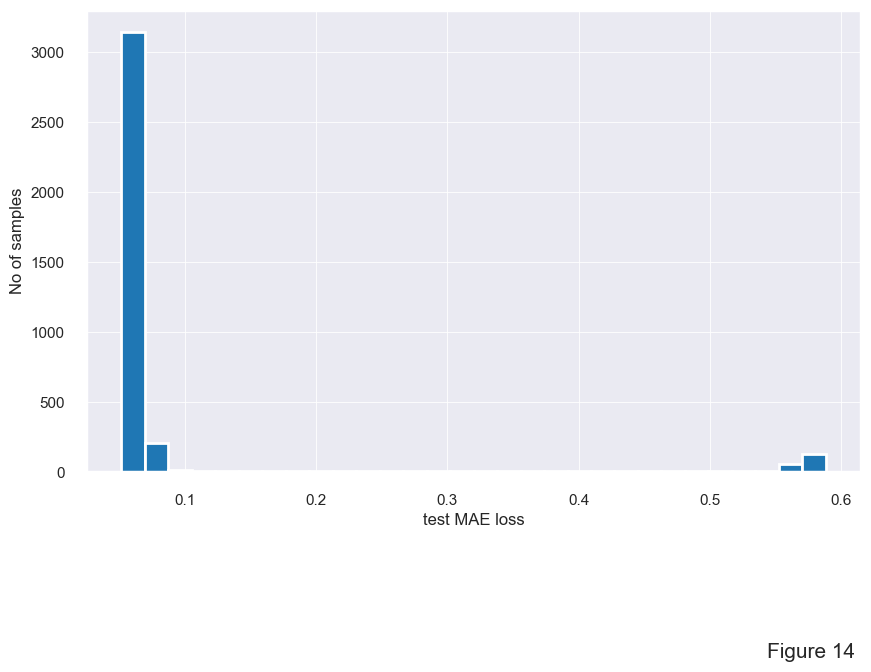

In [137]:
# Create figure and single axes.
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=30)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples")
plt.figtext(0.85, -0.2, 'Figure 14', horizontalalignment='center', fontsize=15);

In [87]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# Number of anomalies.
np.sum(anomalies)

404

In [75]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [109]:
# 
df_subset = df_daily_jumpsup.iloc[inds]
df_subset

,value
timestamp,
2014-04-11 09:00:00,127.882020
2014-04-11 09:05:00,115.705719
2014-04-11 09:10:00,122.386410
2014-04-11 09:15:00,127.261178
2014-04-11 09:20:00,121.157997
...,...
2014-04-11 17:40:00,156.009099
2014-04-11 17:45:00,164.947481
2014-04-11 17:50:00,145.758267


In [91]:
'''
plot bottom plot at window with
- original signal
- predicted signal
- anomoly prediction signal
''';

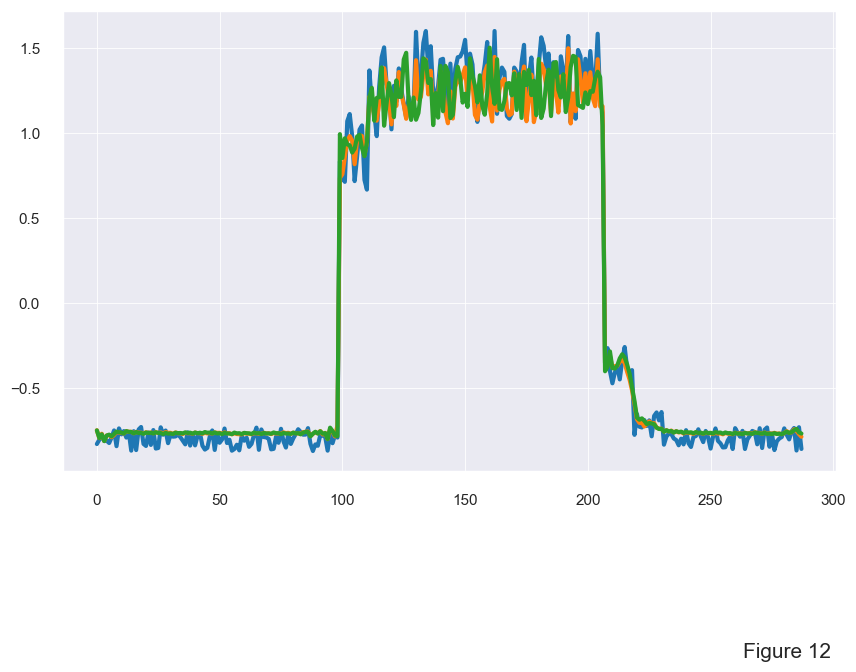

In [145]:
window_number = 9

# Create figure and single axes.
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the training set.
ax.plot(x_train[window_number])

# Plot the neural network predictions (based on non-noisy training inputs).
ax.plot(x_train_pred[window_number]);

# Plot the neural network predictions (based on noisy training inputs).
ax.plot(x_test_pred[window_number]);

# format plot.
plt.figtext(0.85, -0.2, 'Figure 12', horizontalalignment='center', fontsize=15);

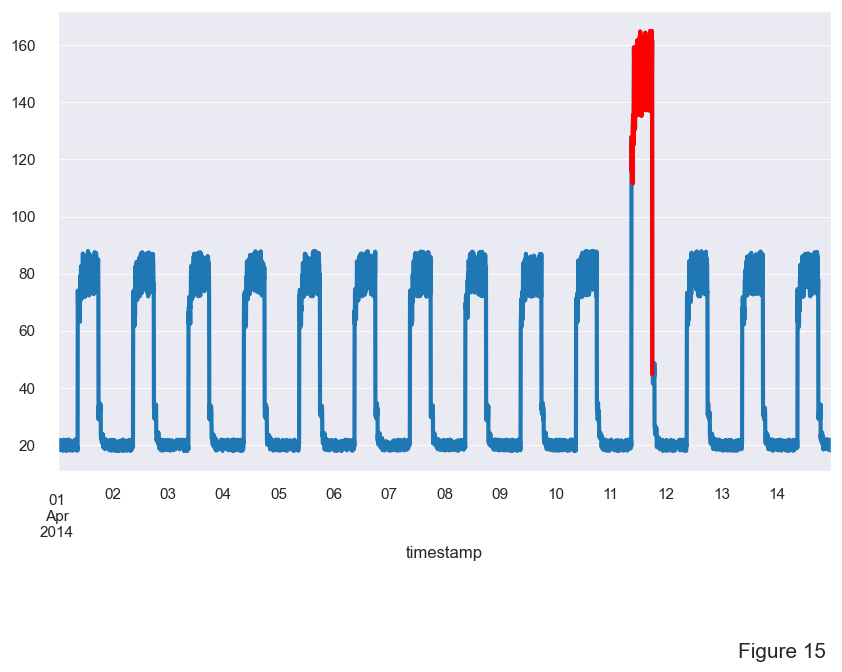

In [138]:
# Create figure and single axes.
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r")
plt.figtext(0.85, -0.2, 'Figure 15', horizontalalignment='center', fontsize=15);

***

## End